In [7]:
import pandas as pd
df=pd.read_csv('./data/zomato.csv')
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,...,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,...,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,...,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,...,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,...,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [8]:
df["Restaurant_latitude"].unique()

array([30.327968, 10.003064, 18.56245 , 30.899584, 26.463504, 19.176269,
       12.311072, 18.592718, 17.426228, 22.552672, 18.563934, 23.357804,
       11.003669, 12.986047, 19.221315, 13.005801, 26.849596, 21.160522,
       12.934179, 18.51421 , 11.022477, 21.160437, 15.51315 , 15.561295,
        0.      , 18.55144 , 18.593481, 21.173343, 17.451976, 12.972532,
       13.064181, 19.121999, 21.149569, 19.091458, 22.539129, 12.970324,
       21.175975, 23.369746, 12.914264, 11.003681, 10.96185 , 27.165108,
       26.88842 , 26.913987, 12.3085  , 21.183434, 19.254567, 25.449659,
       30.372202, 12.972793, 21.157735, 21.186438, 12.935662, 17.431477,
       12.933298, 22.311358, 12.934365, 13.086438, 26.913483, 17.411028,
       18.516216, 15.5696  , 19.876428, 12.939496, 17.433809, 23.374878,
       27.163303, 22.74806 , 26.891191, 12.316967, 18.927584, 11.022298,
       12.325461, 18.530963, 17.458998, 19.1813  , 22.727021, 12.979166,
       18.994237, 12.284747, 11.000762, 26.479108, 

In [2]:
cols_to_clean=["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"]

for col in cols_to_clean:
    df[col]=df[col].abs()

In [ ]:
import logging 
import os
from datetime import datetime

LOG_FILE=f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"
logs_path=os.path.join(os.getcwd(),"logs",LOG_FILE)
os.makedirs(logs_path,exist_ok=True)

LOG_FILE_PATH=os.path.join(logs_path,LOG_FILE)

logging.basicConfig(
    filename=LOG_FILE_PATH,
    format="[ %(asctime)s ] %(lineno)d %(name)s - %(levelname)s - %(message)s",
    level=logging.INFO
)

In [10]:
import sys
from src.logger import logging

def error_message_detail(error,error_detail:sys):
    _,_,exc_tb = error_detail.exc_info()
    file_name = exc_tb.tb_frame.f_code.co_filename

    error_message = "Error occured in python script name [{0}] line number [{1}] error message [{2}]".format(
        file_name, exc_tb.tb_lineno, str(error)
    )

    return error_message

class CustomException(Exception):
    
    def __init__(self, error_message, error_detail:sys):
        super().__init__(error_message)
        self.error_message = error_message_detail(error_message, error_detail=error_detail)

    def __str__(self):
        return self.error_message    
   




In [8]:
import numpy as np
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    lat1=abs(lat1)
    lat2=abs(lat2)
    lon1=abs(lon1)
    lon2=abs(lon2)

    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'], 
                                        df.loc[i, 'Restaurant_longitude'], 
                                        df.loc[i, 'Delivery_location_latitude'], 
                                        df.loc[i, 'Delivery_location_longitude'])

NameError: name 'logging' is not defined

In [3]:
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


In [2]:
!pip install geopy
from geopy.distance import geodesic


for i in range(len(df)):
    df.location[i, 'distance'] = geodesic((df.loc[i, 'Restaurant_latitude'], 
                                        df.loc[i, 'Restaurant_longitude']),
                                        (df.loc[i, 'Delivery_location_latitude'], 
                                        df.loc[i, 'Delivery_location_longitude'])).km


AttributeError: 'numpy.float64' object has no attribute 'abs'

<Axes: >

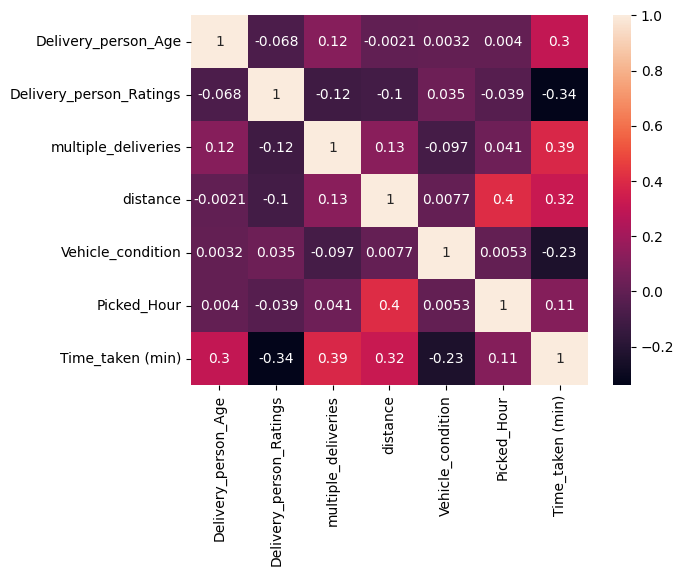

In [61]:
import numpy as np
import seaborn as sns
hm = pd.DataFrame(df, columns=["Delivery_person_Age","Delivery_person_Ratings","multiple_deliveries","distance","Vehicle_condition","Picked_Hour","Time_taken (min)"])
sns.heatmap(hm.corr(),annot=True)

In [1]:
df.head()

NameError: name 'df' is not defined

In [4]:
df["distance"].unique()

array([10.28058206,  6.24231868, 13.78786024, ..., 11.71930094,
       20.07128962, 19.83960676])

In [53]:
df['Order_Date']=pd.to_datetime(df['Order_Date'],dayfirst=True)

df['day']=df['Order_Date'].dt.day
df['month']=df['Order_Date'].dt.month
df['year']=df['Order_Date'].dt.year



df['Order_Hour']=df['Time_Orderd'].str.split(':').str[0]
df['Order_Min']=df['Time_Orderd'].str.split(':').str[1]

df['Picked_Hour']=df['Time_Order_picked'].str.split(':').str[0]
df['Picked_Min']=df['Time_Order_picked'].str.split(':').str[1]


df['Order_Hour']=df['Order_Hour'].fillna(0)
df['Order_Min']=df['Order_Min'].fillna(0)
df['Picked_Hour']=df['Picked_Hour'].fillna(0)
df['Picked_Min']=df['Picked_Min'].fillna(0)



df['Order_Hour']=df['Order_Hour'].astype(float)
df['Order_Min']=df['Order_Min'].astype(float)
df['Picked_Hour']=df['Picked_Hour'].astype(float)
df['Picked_Min']=df['Picked_Min'].astype(float)

In [44]:
for i in df['Delivery_person_Age']:
    if i<30 :
        df['Delivery_person_Age']=df['Delivery_person_Age'].replace(i,1)
    else:
        df['Delivery_person_Age']=df['Delivery_person_Age'].replace(i,2)

In [32]:
for i in df['Delivery_person_Ratings']:
    if i<4.0 :
        df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].replace(i,'2')
        
    
    elif i>=4.0:
        df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].replace(i,'1')

  

In [33]:
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype(float)



In [54]:
df['time_diff']=(df['Picked_Hour']*60+df['Picked_Min'])-(df['Order_Hour']*60+df['Order_Min'])

In [55]:
import numpy as np
for i in df['time_diff']:
    if i<0 or i>120 or i.is_integer()==False:
        df['time_diff']=df['time_diff'].replace(i,np.nan)

In [4]:
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


In [50]:
df['time_diff'].unique()

array([15., 10.,  5., nan, 30., 45., 60.])

In [13]:
df.groupby(by="distance")["Time_taken (min)"].median()

distance
1.465067     16.0
1.465123     18.0
1.465140     27.0
1.465159     19.5
1.465161     22.5
             ... 
20.968993    31.5
20.968994    32.0
20.969028    34.0
20.969045    20.0
20.969489    26.0
Name: Time_taken (min), Length: 4373, dtype: float64

In [8]:
df['time_diff'].unique()

array([15., 10.,  5., nan, 30., 45., 60.])

In [4]:

df=df.drop(labels=['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked','Type_of_order'],axis=1)

In [5]:
df.head()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0,36.0,4.2,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46,10.280582
1,1,21.0,4.7,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23,6.242319
2,2,23.0,4.7,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21,13.787860
3,3,34.0,4.3,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20,2.930258
4,4,24.0,4.7,Fog,Jam,1,scooter,1.0,No,Metropolitian,41,19.396618


In [7]:
df=df.drop(labels=['Weather_conditions'],axis=1)

In [14]:
df.groupby(by="Delivery_person_Age")["Time_taken (min)"].median()

Delivery_person_Age
15.0    26.5
20.0    21.0
21.0    22.0
22.0    22.0
23.0    22.0
24.0    22.0
25.0    22.0
26.0    22.0
27.0    22.0
28.0    22.0
29.0    21.0
30.0    28.0
31.0    29.0
32.0    29.0
33.0    28.0
34.0    29.0
35.0    29.0
36.0    29.0
37.0    28.0
38.0    29.0
39.0    29.0
50.0    22.0
Name: Time_taken (min), dtype: float64

In [76]:
df.groupby(by="distance")["Time_taken (min)"].mean()

distance
1.465067        15.000000
1.465123        18.750000
1.465140        25.333333
1.465159        20.500000
1.465161        23.750000
                  ...    
19070.408110    32.000000
19677.180552    15.000000
19683.687561    22.000000
19688.001288    46.000000
19692.674606    28.000000
Name: Time_taken (min), Length: 4791, dtype: float64

In [39]:
df.groupby(by="Delivery_person_Ratings")["Time_taken (min)"].mean()

Delivery_person_Ratings
1    25.947647
2    36.833211
Name: Time_taken (min), dtype: float64

In [97]:
df['Delivery_person_Age'].unique()

array([2., 1.])

In [38]:
df['Delivery_person_Ratings'].unique()

array(['1', '2', nan], dtype=object)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               45584 non-null  int64  
 1   Delivery_person_Age      43730 non-null  float64
 2   Delivery_person_Ratings  43676 non-null  float64
 3   Weather_conditions       44968 non-null  object 
 4   Road_traffic_density     44983 non-null  object 
 5   Vehicle_condition        45584 non-null  int64  
 6   Type_of_vehicle          45584 non-null  object 
 7   multiple_deliveries      44591 non-null  float64
 8   Festival                 45356 non-null  object 
 9   City                     44384 non-null  object 
 10  Time_taken (min)         45584 non-null  int64  
 11  distance                 45584 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 4.2+ MB


In [40]:
df.groupby(by="City")["Time_taken (min)"].mean()

City
Metropolitian    27.314460
Semi-Urban       49.731707
Urban            22.983322
Name: Time_taken (min), dtype: float64

In [41]:

df.groupby(by="Road_traffic_density")["Time_taken (min)"].mean()

Road_traffic_density
High      27.240109
Jam       31.176038
Low       21.266671
Medium    26.699680
Name: Time_taken (min), dtype: float64

In [19]:
df=df.drop(labels=['Type_of_vehicle'],axis=1)

In [8]:
df.head()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0,36.0,4.2,Jam,2,motorcycle,3.0,No,Metropolitian,46,10.280582
1,1,21.0,4.7,High,1,motorcycle,1.0,No,Metropolitian,23,6.242319
2,2,23.0,4.7,Medium,1,scooter,1.0,No,Metropolitian,21,13.787860
3,3,34.0,4.3,Low,0,motorcycle,0.0,No,Metropolitian,20,2.930258
4,4,24.0,4.7,Jam,1,scooter,1.0,No,Metropolitian,41,19.396618


In [7]:
##Independent and Dependent Features

X=df.drop(labels=['Time_taken (min)'],axis=1)
Y=df[['Time_taken (min)']]

In [8]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [10]:
categorical_cols

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle',
       'Festival', 'City'],
      dtype='object')

In [9]:
numerical_cols

Index(['Unnamed: 0', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Vehicle_condition', 'multiple_deliveries', 'distance'],
      dtype='object')

In [12]:
# Define the custom ranking for each ordinal variable
Weather_conditions_Map=["Sunny","Stormy","Sandstorms","Windy","Fog","Cloudy"]

Road_Traffic_Map=["Low","Medium","High","Jam"]
Type_of_vehicle_map=["bicycle","electric_scooter","scooter","motorcycle"]
Festival_Map=["No","Yes"]
City_Map=["Urban","Metropolitian","Semi-Urban"]


In [13]:
from sklearn.impute import SimpleImputer ##Handling Missing Values
from sklearn.preprocessing import StandardScaler ##Handling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder ##Handling categorical data doing Ordinal Encoding
from sklearn.pipeline import Pipeline ## To create a pipeline so things happen in sequence
from sklearn.compose import ColumnTransformer ## To combine num and cat pipelines

In [14]:
##Numerical Pipelines

num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

##Categorical Pipelinr

cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[Road_Traffic_Map,Type_of_vehicle_map,Festival_Map,City_Map])),
    ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer( [
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])


In [15]:
## Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [63]:
X_train

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,distance
5755,5755,2.0,1.0,Sandstorms,Jam,0,motorcycle,0.0,No,Metropolitian,10.602504
9163,9163,1.0,2.0,Sunny,Jam,0,motorcycle,3.0,Yes,Urban,9.088005
16410,16410,2.0,1.0,Windy,Low,2,scooter,1.0,No,Metropolitian,2.984613
36945,36945,2.0,1.0,Windy,Jam,2,scooter,1.0,No,Metropolitian,20.087481
14679,14679,2.0,1.0,Windy,Low,0,motorcycle,1.0,No,Urban,3.059403
...,...,...,...,...,...,...,...,...,...,...,...
919,919,2.0,1.0,Sunny,Low,1,motorcycle,0.0,No,Urban,2.984598
33268,33268,1.0,1.0,Fog,Medium,2,motorcycle,0.0,No,Metropolitian,7.683745
44845,44845,1.0,NaN,Fog,Low,2,scooter,1.0,No,Metropolitian,12.108727
4517,4517,2.0,1.0,Cloudy,Low,1,motorcycle,NaN,No,Metropolitian,3.105145


In [16]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train) , columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test) , columns=preprocessor.get_feature_names_out())

In [65]:
X_train

,num_pipeline__Unnamed: 0,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,num_pipeline__distance,cat_pipeline__Weather_conditions,cat_pipeline__Road_traffic_density,cat_pipeline__Type_of_vehicle,cat_pipeline__Festival,cat_pipeline__City
0,-1.293428,0.950873,-0.177068,-1.223528,-1.318236,-0.079476,-0.316528,1.308057,0.777630,-0.142953,0.516375
1,-1.035034,-1.051665,5.647552,-1.223528,3.943714,-0.080867,-1.490785,1.308057,0.777630,6.995304,-1.859815
2,-0.485569,0.950873,-0.177068,1.160323,0.435747,-0.086475,0.270600,-1.093916,-0.753919,-0.142953,0.516375
3,1.071388,0.950873,-0.177068,1.160323,0.435747,-0.070761,0.270600,1.308057,-0.753919,-0.142953,0.516375
4,-0.616813,0.950873,-0.177068,-1.223528,0.435747,-0.086406,0.270600,-1.093916,0.777630,-0.142953,-1.859815
...,...,...,...,...,...,...,...,...,...,...,...
31903,-1.660092,0.950873,-0.177068,-0.031602,-1.318236,-0.086475,-1.490785,-1.093916,0.777630,-0.142953,-1.859815
31904,0.792599,-1.051665,-0.177068,1.160323,-1.318236,-0.082157,0.857728,-0.293258,0.777630,-0.142953,0.516375
31905,1.670364,-1.051665,-0.177068,1.160323,0.435747,-0.078092,0.857728,-1.093916,-0.753919,-0.142953,0.516375
31906,-1.387293,0.950873,-0.177068,-0.031602,0.435747,-0.086364,1.444857,-1.093916,0.777630,-0.142953,0.516375


In [39]:
X_train.shape
X_test.shape

(13676, 18)

In [40]:
X_train.shape

(31908, 18)

In [17]:
##Model Training

from sklearn.linear_model import LinearRegression ,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [18]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [19]:
import numpy as np
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse= np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [20]:
##Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()

}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Prediction

    y_pred=model.predict(X_test)

    mae,mse,rmse,r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    

    print ('Model Training Performance')
    print ("RMSE:",rmse)
    print ("MAE :",mae )
    print("MSE :",mse)
    print("R2 score :",r2_square*100)

    r2_list.append(r2_square*100)

    print('='*35)
    print('\n')





LinearRegression
Model Training Performance
RMSE: 6.494382914174491
MAE : 5.1464759286284085
MSE : 42.177009435921555
R2 score : 51.237585501212


Lasso
Model Training Performance
RMSE: 6.872855548115797
MAE : 5.48698837354413
MSE : 47.23614338526608
R2 score : 45.388531954216774


Ridge
Model Training Performance
RMSE: 6.494381856638031
MAE : 5.146476639578539
MSE : 42.17699569982924
R2 score : 51.23760138202091


ElasticNet
Model Training Performance
RMSE: 6.9442453730149944
MAE : 5.566312419938407
MSE : 48.22254380064016
R2 score : 44.24811762518941




In [47]:
##Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()

}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Prediction

    y_train_pred=model.predict(X_train)

    mae,mse,rmse,r2_square=evaluate_model(y_train,y_train_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    

    print ('Model Training Performance')
    print ("RMSE:",rmse)
    print ("MAE :",mae )
    print("MSE :",mse)
    print("R2 score :",r2_square*100)

    r2_list.append(r2_square*100)

    print('='*35)
    print('\n')





LinearRegression
Model Training Performance
RMSE: 6.429554099207002
MAE : 5.165113459696919
MSE : 41.33916591462957
R2 score : 53.41193106547556


Lasso
Model Training Performance
RMSE: 6.920066594565273
MAE : 5.602788944009053
MSE : 47.88732167321821
R2 score : 46.03234502096926


Ridge
Model Training Performance
RMSE: 6.429554101396151
MAE : 5.1651148556358235
MSE : 41.33916594278006
R2 score : 53.41193103375075


ElasticNet
Model Training Performance
RMSE: 6.97747601429731
MAE : 5.666672872234
MSE : 48.68517153009427
R2 score : 45.133190833671335


